In [7]:
import torch
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from PIL import Image
from PIL.ImageDraw import Draw
import random
import numpy as np

In [8]:
from utils import *
from model import RPN
from train import train, load_checkpoint
from inference import inference

Variables

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

datatset_path = '../datasets/dataset_v3'

batch_size = 256
num_epochs = 30
lr = 1e-4

conf_threshold=0.90
nms_threshold=0.30

Data Loaders

In [10]:
# Set a random seed for reproducibility
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

# Load the dataset
dataset = RPNDataset(datatset_path, transform=transform, resize=ResizeWithPad(224))

total_size = len(dataset)
train_size = int(0.90 * total_size)
#val_size = int(0.10 * total_size)
#test_size = total_size - train_size - val_size
val_size = total_size - train_size

# Randomly split the dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataset.transform = transform_noise

# Create the DataLoader for the training set
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, collate_fn=collate_fn)

# Create the DataLoader for the validation set
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, collate_fn=collate_fn)

In [13]:
model = RPN(dropout_rate=0.3, device=device).to(device)

In [14]:
model, train_loss_history, val_loss_history, precision_recall_history = train(model, train_loader, val_loader, num_epochs, lr, conf_threshold, nms_threshold, device)

Training: 100%|██████████| 176/176 [19:00<00:00,  6.48s/it]


Epoch [1/30], Train Loss: 641.6444


Validation: 100%|██████████| 20/20 [01:41<00:00,  5.07s/it]


Epoch [1/30], Val Loss: 729.9892, mAP: 0.0000, Precision: 1.0000, Recall: 0.0000, F1-score: 0.0000
Checkpoint saved at checkpoints/model_epoch_1.pth


Training: 100%|██████████| 176/176 [17:58<00:00,  6.13s/it]


Epoch [2/30], Train Loss: 764.2122


Validation: 100%|██████████| 20/20 [01:43<00:00,  5.16s/it]


Epoch [2/30], Val Loss: 682.9489, mAP: 0.0126, Precision: 0.9648, Recall: 0.0093, F1-score: 0.0154
Checkpoint saved at checkpoints/model_epoch_2.pth


Training: 100%|██████████| 176/176 [17:50<00:00,  6.08s/it]


Epoch [3/30], Train Loss: 737.3303


Validation: 100%|██████████| 20/20 [01:45<00:00,  5.27s/it]


Epoch [3/30], Val Loss: 630.8417, mAP: 0.1759, Precision: 0.6819, Recall: 0.1294, F1-score: 0.2150
Checkpoint saved at checkpoints/model_epoch_3.pth


Training: 100%|██████████| 176/176 [17:50<00:00,  6.08s/it]


Epoch [4/30], Train Loss: 704.7767


Validation: 100%|██████████| 20/20 [01:45<00:00,  5.28s/it]


Epoch [4/30], Val Loss: 602.3769, mAP: 0.1959, Precision: 0.6709, Recall: 0.1492, F1-score: 0.2406
Checkpoint saved at checkpoints/model_epoch_4.pth


Training: 100%|██████████| 176/176 [17:57<00:00,  6.12s/it]


Epoch [5/30], Train Loss: 686.7601


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.34s/it]


Epoch [5/30], Val Loss: 589.1208, mAP: 0.2188, Precision: 0.6866, Recall: 0.1749, F1-score: 0.2723
Checkpoint saved at checkpoints/model_epoch_5.pth


Training: 100%|██████████| 176/176 [17:54<00:00,  6.11s/it]


Epoch [6/30], Train Loss: 676.1882


Validation: 100%|██████████| 20/20 [01:45<00:00,  5.29s/it]


Epoch [6/30], Val Loss: 589.8654, mAP: 0.2542, Precision: 0.6926, Recall: 0.2150, F1-score: 0.3188
Checkpoint saved at checkpoints/model_epoch_6.pth


Training: 100%|██████████| 176/176 [17:53<00:00,  6.10s/it]


Epoch [7/30], Train Loss: 679.9692


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.35s/it]


Epoch [7/30], Val Loss: 594.3604, mAP: 0.2889, Precision: 0.6827, Recall: 0.2569, F1-score: 0.3620
Checkpoint saved at checkpoints/model_epoch_7.pth


Training: 100%|██████████| 176/176 [17:56<00:00,  6.12s/it]


Epoch [8/30], Train Loss: 673.1635


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.31s/it]


Epoch [8/30], Val Loss: 585.9680, mAP: 0.3217, Precision: 0.6934, Recall: 0.2914, F1-score: 0.3980
Checkpoint saved at checkpoints/model_epoch_8.pth


Training: 100%|██████████| 176/176 [17:59<00:00,  6.13s/it]


Epoch [9/30], Train Loss: 664.8144


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.36s/it]


Epoch [9/30], Val Loss: 579.1810, mAP: 0.3298, Precision: 0.6995, Recall: 0.3000, F1-score: 0.4074
Checkpoint saved at checkpoints/model_epoch_9.pth


Training: 100%|██████████| 176/176 [18:04<00:00,  6.16s/it]


Epoch [10/30], Train Loss: 662.6093


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.38s/it]


Epoch [10/30], Val Loss: 575.6292, mAP: 0.3677, Precision: 0.6847, Recall: 0.3465, F1-score: 0.4469
Checkpoint saved at checkpoints/model_epoch_10.pth


Training: 100%|██████████| 176/176 [18:00<00:00,  6.14s/it]


Epoch [11/30], Train Loss: 655.3926


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.33s/it]


Epoch [11/30], Val Loss: 572.3491, mAP: 0.4024, Precision: 0.6834, Recall: 0.3877, F1-score: 0.4814
Checkpoint saved at checkpoints/model_epoch_11.pth


Training: 100%|██████████| 176/176 [17:40<00:00,  6.03s/it]


Epoch [12/30], Train Loss: 650.8624


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.33s/it]


Epoch [12/30], Val Loss: 569.3625, mAP: 0.4124, Precision: 0.6893, Recall: 0.3978, F1-score: 0.4902
Checkpoint saved at checkpoints/model_epoch_12.pth


Training: 100%|██████████| 176/176 [17:53<00:00,  6.10s/it]


Epoch [13/30], Train Loss: 645.9981


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.37s/it]


Epoch [13/30], Val Loss: 569.2058, mAP: 0.3963, Precision: 0.7049, Recall: 0.3760, F1-score: 0.4773
Checkpoint saved at checkpoints/model_epoch_13.pth


Training: 100%|██████████| 176/176 [17:51<00:00,  6.09s/it]


Epoch [14/30], Train Loss: 639.9628


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.32s/it]


Epoch [14/30], Val Loss: 562.3149, mAP: 0.4534, Precision: 0.6793, Recall: 0.4500, F1-score: 0.5291
Checkpoint saved at checkpoints/model_epoch_14.pth


Training: 100%|██████████| 176/176 [17:51<00:00,  6.09s/it]


Epoch [15/30], Train Loss: 633.7120


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.33s/it]


Epoch [15/30], Val Loss: 564.0423, mAP: 0.4517, Precision: 0.6754, Recall: 0.4480, F1-score: 0.5253
Checkpoint saved at checkpoints/model_epoch_15.pth


Training: 100%|██████████| 176/176 [17:58<00:00,  6.13s/it]


Epoch [16/30], Train Loss: 629.2720


Validation: 100%|██████████| 20/20 [01:42<00:00,  5.11s/it]


Epoch [16/30], Val Loss: 557.6474, mAP: 0.4837, Precision: 0.6627, Recall: 0.4892, F1-score: 0.5511
Checkpoint saved at checkpoints/model_epoch_16.pth


Training: 100%|██████████| 176/176 [17:57<00:00,  6.12s/it]


Epoch [17/30], Train Loss: 625.1997


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.38s/it]


Epoch [17/30], Val Loss: 557.0780, mAP: 0.4907, Precision: 0.6682, Recall: 0.4952, F1-score: 0.5570
Checkpoint saved at checkpoints/model_epoch_17.pth


Training: 100%|██████████| 176/176 [18:00<00:00,  6.14s/it]


Epoch [18/30], Train Loss: 621.6552


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.35s/it]


Epoch [18/30], Val Loss: 559.5077, mAP: 0.4882, Precision: 0.6701, Recall: 0.4926, F1-score: 0.5558
Checkpoint saved at checkpoints/model_epoch_18.pth


Training: 100%|██████████| 176/176 [17:57<00:00,  6.12s/it]


Epoch [19/30], Train Loss: 618.1143


Validation: 100%|██████████| 20/20 [01:50<00:00,  5.55s/it]


Epoch [19/30], Val Loss: 553.4194, mAP: 0.5116, Precision: 0.6545, Recall: 0.5232, F1-score: 0.5720
Checkpoint saved at checkpoints/model_epoch_19.pth


Training: 100%|██████████| 176/176 [18:17<00:00,  6.23s/it]


Epoch [20/30], Train Loss: 615.6032


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.38s/it]


Epoch [20/30], Val Loss: 558.0627, mAP: 0.5234, Precision: 0.6412, Recall: 0.5403, F1-score: 0.5788
Checkpoint saved at checkpoints/model_epoch_20.pth


Training: 100%|██████████| 176/176 [17:56<00:00,  6.12s/it]


Epoch [21/30], Train Loss: 616.4346


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.36s/it]


Epoch [21/30], Val Loss: 560.4265, mAP: 0.5268, Precision: 0.6558, Recall: 0.5418, F1-score: 0.5847
Checkpoint saved at checkpoints/model_epoch_21.pth


Training: 100%|██████████| 176/176 [18:02<00:00,  6.15s/it]


Epoch [22/30], Train Loss: 614.3248


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.36s/it]


Epoch [22/30], Val Loss: 559.8994, mAP: 0.5417, Precision: 0.6276, Recall: 0.5662, F1-score: 0.5905
Checkpoint saved at checkpoints/model_epoch_22.pth


Training: 100%|██████████| 176/176 [18:02<00:00,  6.15s/it]


Epoch [23/30], Train Loss: 612.2115


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.37s/it]


Epoch [23/30], Val Loss: 557.0577, mAP: 0.5436, Precision: 0.6441, Recall: 0.5639, F1-score: 0.5949
Checkpoint saved at checkpoints/model_epoch_23.pth


Training: 100%|██████████| 176/176 [18:03<00:00,  6.16s/it]


Epoch [24/30], Train Loss: 611.6471


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.40s/it]


Epoch [24/30], Val Loss: 563.1864, mAP: 0.5460, Precision: 0.6400, Recall: 0.5677, F1-score: 0.5961
Checkpoint saved at checkpoints/model_epoch_24.pth


Training: 100%|██████████| 176/176 [17:57<00:00,  6.12s/it]


Epoch [25/30], Train Loss: 610.6126


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.35s/it]


Epoch [25/30], Val Loss: 566.1202, mAP: 0.5413, Precision: 0.6261, Recall: 0.5672, F1-score: 0.5904
Checkpoint saved at checkpoints/model_epoch_25.pth


Training: 100%|██████████| 176/176 [17:50<00:00,  6.08s/it]


Epoch [26/30], Train Loss: 608.8548


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.38s/it]


Epoch [26/30], Val Loss: 567.5324, mAP: 0.5476, Precision: 0.6300, Recall: 0.5732, F1-score: 0.5958
Checkpoint saved at checkpoints/model_epoch_26.pth


Training: 100%|██████████| 176/176 [17:57<00:00,  6.12s/it]


Epoch [27/30], Train Loss: 605.1396


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.40s/it]


Epoch [27/30], Val Loss: 564.4976, mAP: 0.5512, Precision: 0.6176, Recall: 0.5800, F1-score: 0.5954
Checkpoint saved at checkpoints/model_epoch_27.pth


Training: 100%|██████████| 176/176 [17:55<00:00,  6.11s/it]


Epoch [28/30], Train Loss: 604.2885


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.37s/it]


Epoch [28/30], Val Loss: 565.0160, mAP: 0.5618, Precision: 0.6153, Recall: 0.5944, F1-score: 0.6030
Checkpoint saved at checkpoints/model_epoch_28.pth


Training: 100%|██████████| 176/176 [17:56<00:00,  6.11s/it]


Epoch [29/30], Train Loss: 601.9601


Validation: 100%|██████████| 20/20 [01:47<00:00,  5.37s/it]


Epoch [29/30], Val Loss: 565.2514, mAP: 0.5588, Precision: 0.6100, Recall: 0.5928, F1-score: 0.6000
Checkpoint saved at checkpoints/model_epoch_29.pth


Training: 100%|██████████| 176/176 [18:02<00:00,  6.15s/it]


Epoch [30/30], Train Loss: 599.3117


Validation: 100%|██████████| 20/20 [01:46<00:00,  5.34s/it]


Epoch [30/30], Val Loss: 564.0079, mAP: 0.5661, Precision: 0.6141, Recall: 0.5998, F1-score: 0.6059
Checkpoint saved at checkpoints/model_epoch_30.pth


In [10]:
model = load_model(RPN(dropout_rate=0.3, device=device), 'models/v1.pth')
model = model.to(device)

/mnt/d/Documents/GitHub/captcha_solver/character_detection/utils/__init__.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


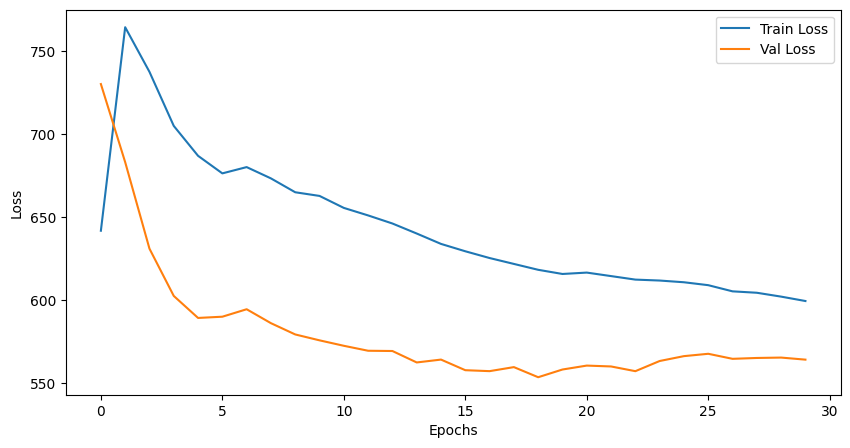

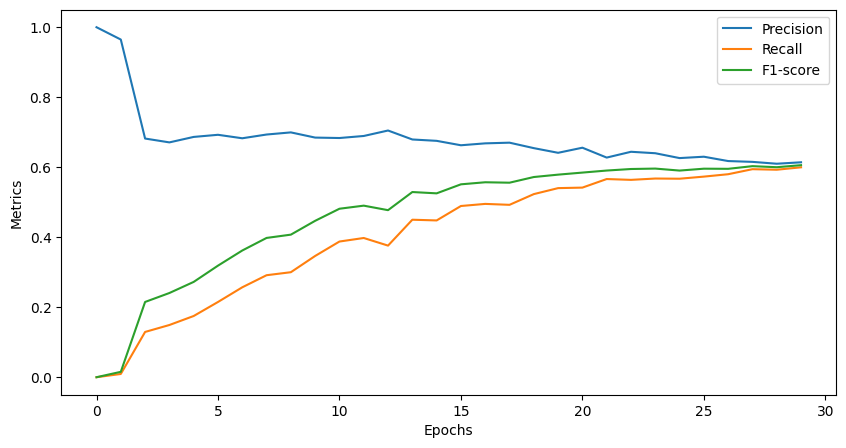

In [15]:
# plot loass and precision recall togheter
plot_loss(train_loss_history, val_loss_history)
plot_precision_recall_f1(precision_recall_history)

In [ ]:
model = RPN(dropout_rate=0.3, device=device).to(device)
epoch, train_loss_history, val_loss_history = load_checkpoint('checkpoints/model_epoch_10.pth', model)

Raw proposals shape: torch.Size([1, 735, 4])
Objectness logits shape: torch.Size([1, 735, 2])
Max objectness score: 9.730867385864258
Min objectness score: -10.186284065246582
After softmax, max score: 0.9955272078514099
Number of proposals after confidence thresholding: 208
Filtered boxes shape: torch.Size([208, 4])
Filtered scores shape: torch.Size([208])
Number of boxes after NMS: 5


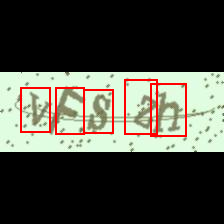

In [25]:
image_path = '../datasets/dataset_v3/100.jpg'
boxes, scores = inference(model, image_path, device, transform, ResizeWithPad(224), conf_threshold=0.95, nms_threshold=0.30)
target = boxes.tolist()
show_image(image_path, target)